<a href="https://colab.research.google.com/github/fedesfeir/Overshoot-Day-Analysis/blob/main/overshootday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How the overshoot day is it linked to life expectancy, human dvp index, per_capita, population, production and consumption ?**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

The analysis investigates how the Overshoot Day is linked to life expectancy, human development index (HDI), GDP per capita, population, production, and consumption.

In [3]:
## Read data
dta = pd.read_csv('overshootday_overview.csv')
dta = dta.dropna()

# Summary for numerical variables
print(dta.describe())

       life_expectancy         hdi  per_capita_gdp          pop  total_prod  \
count       167.000000  167.000000      167.000000   167.000000  167.000000   
mean         72.531798    0.722108    14134.070787    44.491325    3.056235   
std           7.484902    0.150773    19763.533118   158.168844    2.615103   
min          52.805000    0.391000      210.804080     0.096286    0.300103   
25%          67.475500    0.599000     1779.638788     3.060985    1.253923   
50%          74.131000    0.746000     5471.835506     9.630960    1.985990   
75%          77.617700    0.839000    16194.654522    31.758650    4.240380   
max          84.211000    0.956000   111380.649478  1459.380000   12.055943   

       total_cons  number_of_countries_required  number_of_earths_required  \
count  167.000000                    167.000000                 167.000000   
mean     3.227056                      3.702138                   2.039055   
std      2.308365                      8.888881       

In [4]:
# Summary for cetegorical variables
print(dta['region'].value_counts())
print(dta['income_group'].value_counts())

region
Africa                       46
Asia-Pacific                 28
EU                           27
Middle East/Central Asia     23
Central America/Caribbean    17
Other Europe                 12
South America                11
North America                 3
Name: count, dtype: int64
income_group
HI    47
UM    44
LM    44
LI    32
Name: count, dtype: int64


## Descriptive statistics
The dataset includes 167 countries, with variables covering socio-economic indicators (life expectancy, HDI, per capita GDP, population) and ecological metrics (production, consumption, overshoot day, number of Earths required). Overshoot day varies widely, from as early as day 40 to as late as day 365, indicating strong differences between countries.

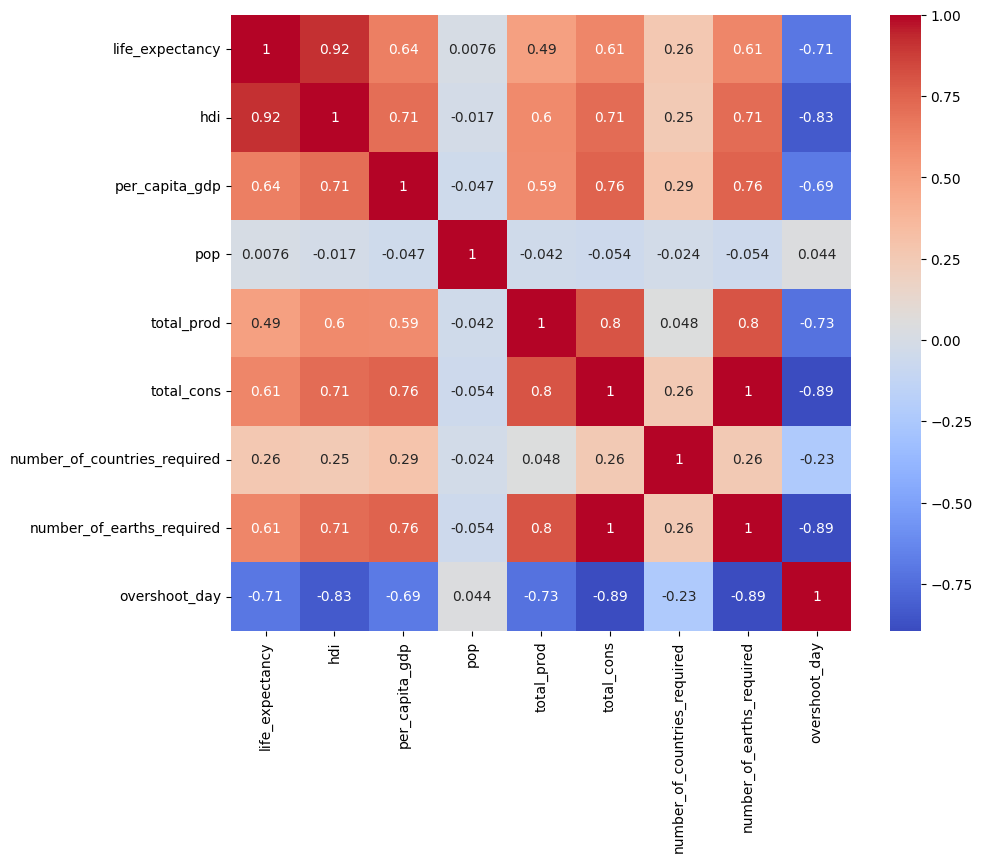

In [5]:
# correlations
# numerical columns
numeric_columns = dta.select_dtypes(include=['float64', 'int64']).columns

# Correlation with oonly numerical variable
corr_matrix = dta[numeric_columns].corr()

#Correlation as heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

##Correlation analysis
The heatmap of correlations provides key insights:
Negative correlations with overshoot_day:
- HDI (r = -0.83)
- Total consumption (r = -0.89)
- Number of Earths required (r = -0.89)
- Per capita GDP (r = -0.69)
- Life expectancy (r = -0.71)
- Total production (r = -0.72)

These strong negative correlations suggest that higher development, income, consumption, and life expectancy are associated with an earlier Overshoot Day (i.e., more ecological overshoot).

Population shows almost no correlation (r = 0.04), suggesting that total population is not a direct driver of overshoot day compared to per-capita consumption and development indicators.

# Interpretation

Countries with higher economic development and standards of living (high HDI, higher GDP per capita, longer life expectancy) tend to overshoot ecological limits earlier in the year.

The strongest driver appears to be total consumption and ecological footprint (number of Earths required), which are almost perfectly negatively correlated with overshoot day.

Population size alone does not explain overshoot day; rather, it is the intensity of consumption and production that matters most.

**Does this reation change according to the world region ?**

In [6]:
m1 = smf.ols(formula='overshoot_day ~ life_expectancy + hdi + per_capita_gdp + pop + total_prod + total_cons ', data=dta)

# model ajust
results_m1 = m1.fit()

# print regression results
print(results_m1.summary())

                            OLS Regression Results                            
Dep. Variable:          overshoot_day   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     212.2
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           1.76e-73
Time:                        09:59:35   Log-Likelihood:                -839.22
No. Observations:                 167   AIC:                             1692.
Df Residuals:                     160   BIC:                             1714.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         476.3372     42.542     

**Model 1: Overshoot Day ~ Life Expectancy + HDI + GDP per capita + Population + Total Production + Total Consumption**

R² = 0.888 → The model explains about 89% of the variance in Overshoot Day, which is very high.

Significant predictors:

- Life expectancy (+), HDI (−), GDP per capita (+), and Total consumption (−).

- Total production and population are not significant.

Countries with higher HDI and higher consumption tend to have earlier overshoot days (negative effect), while higher GDP per capita and life expectancy slightly delay overshoot day. The negative HDI effect is particularly strong.

Issue: The condition number is very large, suggesting multicollinearity (these development indicators are highly correlated).

In [7]:

m2 = smf.ols(formula='overshoot_day ~ life_expectancy + hdi + per_capita_gdp + total_cons ', data=dta)
results_m2 = m2.fit()

In [8]:
m1 = smf.ols(formula='overshoot_day ~ life_expectancy + hdi + per_capita_gdp + pop + total_prod + total_cons ', data=dta)
# model ajust
results_m1 = m1.fit()


m2 = smf.ols(formula='overshoot_day ~ life_expectancy + hdi + per_capita_gdp + total_cons ', data=dta)
results_m2 = m2.fit()

## compare m1 and m2
anova_results = anova_lm(results_m2, results_m1)
print(anova_results)

   df_resid            ssr  df_diff    ss_diff         F   Pr(>F)
0     162.0  226676.176959      0.0        NaN       NaN      NaN
1     160.0  226532.705100      2.0  143.47186  0.050667  0.95061


In [9]:
print(results_m2.summary())

                            OLS Regression Results                            
Dep. Variable:          overshoot_day   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     322.0
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           5.75e-76
Time:                        10:04:41   Log-Likelihood:                -839.27
No. Observations:                 167   AIC:                             1689.
Df Residuals:                     162   BIC:                             1704.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         476.8718     42.177     

**Model 2: Removing population and total production**

R² = 0.888 (basically the same as Model 1).

ANOVA comparison (m1 vs m2): No significant difference (p = 0.95).

Removing population and production does not reduce explanatory power, confirming they are not meaningful predictors of Overshoot Day. The main drivers remain HDI, GDP per capita, life expectancy, and consumption.

In [10]:
# Getting the covariance matrix of the parameter estimates
cov_matrix = results_m1.cov_params()
print(cov_matrix)

                   Intercept  life_expectancy          hdi  per_capita_gdp  \
Intercept        1809.795372       -38.053115  1307.662264    2.399071e-03   
life_expectancy   -38.053115         0.984492   -47.442516   -1.224311e-05   
hdi              1307.662264       -47.442516  3177.984385   -2.098635e-03   
per_capita_gdp      0.002399        -0.000012    -0.002099    5.922858e-08   
pop                 0.028414        -0.000912     0.023378    1.128577e-07   
total_prod         -5.144821         0.195591   -14.080334    2.688437e-05   
total_cons         -1.542778         0.161323   -27.815941   -2.850716e-04   

                          pop  total_prod  total_cons  
Intercept        2.841366e-02   -5.144821   -1.542778  
life_expectancy -9.124414e-04    0.195591    0.161323  
hdi              2.337776e-02  -14.080334  -27.815941  
per_capita_gdp   1.128577e-07    0.000027   -0.000285  
pop              3.432641e-04   -0.000096    0.001336  
total_prod      -9.620714e-05    3.5624

In [11]:
m3 = smf.ols(formula='overshoot_day ~ income_group + life_expectancy + hdi + per_capita_gdp + total_cons + income_group:life_expectancy + income_group:hdi + income_group:per_capita_gdp + income_group:total_cons', data=dta)
results_m3 = m3.fit()
print(results_m3.summary())

                            OLS Regression Results                            
Dep. Variable:          overshoot_day   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     172.6
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.17e-90
Time:                        10:05:09   Log-Likelihood:                -759.34
No. Observations:                 167   AIC:                             1559.
Df Residuals:                     147   BIC:                             1621.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

**Model 3: Adding income group as moderator (interactions with predictors)**

R² = 0.957 → Substantially higher explanatory power compared to models 1 and 2.

Key results:
- Income groups have different intercepts, showing that baseline Overshoot Day varies by development level.

- Some interactions between income group and HDI, GDP per capita, and consumption are significant. For example, the negative effect of consumption on Overshoot Day is stronger in middle- and upper-middle-income groups.

The relationship between overshoot and development/consumption is not uniform across all countries—it depends on their income group. High- and upper-middle-income countries show much sharper ecological overshoot patterns compared to low-income ones.

In [12]:
m4 = smf.ols(formula='overshoot_day ~ income_group + life_expectancy + hdi + per_capita_gdp + total_cons + income_group:hdi + income_group:total_cons', data=dta)
results_m4 = m4.fit()
anova_results = anova_lm(results_m4, results_m3)
print(anova_results)

print(results_m4.summary())

   df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0     153.0  90805.946608      0.0          NaN       NaN       NaN
1     147.0  87032.348502      6.0  3773.598106  1.062285  0.387932
                            OLS Regression Results                            
Dep. Variable:          overshoot_day   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     251.2
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           4.78e-96
Time:                        10:05:33   Log-Likelihood:                -762.89
No. Observations:                 167   AIC:                             1554.
Df Residuals:                     153   BIC:                             1597.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
      

**Model 4: Simplified interaction model**

R² = 0.955 (almost the same as Model 3).

ANOVA comparison (m3 vs m4): No significant difference (p = 0.39).

The extra complexity of Model 3 (all interactions) does not improve fit compared to the reduced interaction model (Model 4). This suggests that only a subset of interactions matters, mainly those involving HDI and consumption with income groups.

#**Final Conclusions**
The analysis aimed to understand how Overshoot Day is linked to life expectancy, human development index (HDI), GDP per capita, population, production, and consumption, and whether these relationships vary across world regions or income groups.

##Main Drivers of Overshoot Day

The correlation analysis revealed that Overshoot Day is strongly negatively associated with HDI, life expectancy, GDP per capita, and especially total consumption and the ecological footprint (number of Earths required).

In practical terms, this means that countries with higher standards of living and higher consumption patterns tend to reach their Overshoot Day much earlier in the year.

Conversely, population size and total production did not show a meaningful relationship with Overshoot Day once per-capita indicators were considered. This indicates that it is not the number of people, but how much each person consumes, that drives ecological overshoot.

##Regression Results Without Income Groups

The regression models confirmed these findings. HDI and total consumption had the strongest negative effects on Overshoot Day, while GDP per capita and life expectancy showed weaker but still significant positive effects.

Population and production were not significant predictors, and removing them from the model did not reduce explanatory power.

The models without income groups already explained a very high share of the variance in Overshoot Day (R² ≈ 0.89), highlighting the strong influence of development and consumption indicators.

##Effect of Income Groups

When income groups were added as moderators, the explanatory power of the model increased substantially (R² ≈ 0.95).

This shows that the relationship between development, consumption, and Overshoot Day is not the same across the world.

In higher-income countries, increases in HDI and consumption bring Overshoot Day significantly earlier, reflecting their disproportionate ecological impact.

In lower-income countries, the relationship is weaker, as consumption levels are already much lower, and ecological overshoot occurs later or not at all.

##Role of World Regions and Development Levels

The ANOVA comparisons indicated that adding regional or income group interactions significantly improved the model fit, confirming that context matters.

Overshoot Day is shaped not just by absolute levels of consumption or development, but also by the structural differences between countries at different stages of economic development.

#Overall Conclusion

Overshoot Day is a powerful indicator of the ecological imbalance between humanity's demand and Earth's capacity. The results clearly show that higher human development and economic prosperity are linked to earlier ecological overshoot, primarily through greater consumption and resource use per capita.

Importantly, these relationships differ by income group: in high- and upper-middle-income countries, development gains come at the cost of much earlier Overshoot Days, while in lower-income countries the ecological pressure is weaker.

Thus, the challenge is not simply reducing global population or production but rethinking consumption patterns in wealthier regions, where ecological overshoot is most severe. Sustainable development must balance improvements in human well-being with reductions in resource use, particularly in countries where overshoot occurs earliest.

